<a href="https://colab.research.google.com/github/jharilal/Spaceship_Titanic/blob/main/Space_Titanic_Kaggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship Titanic - Kaggle Competition

Goal: Given a dataset with a variety of attibutes, predict which passengers are transported

## Project Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train_df = pd.read_csv('train.csv')

In [6]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

## Exploratory Data Analysis

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
# Many monetary values. It will be interesting to see how these influence transportation
# Will likely need to transform the monetary values, since thtere seems to be heavy skew
# Many null values need to be imputed

In [12]:
train_df.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [13]:
# Half of the travelers are from earth
# ~62.5% of passengers are not in cryosleep
# many unique cabins, possibility of generalizing into general area rather than individual numbers - cabin and side may be important
# Very few VIPs, might be worth dropping this column later on

In [14]:
# Create a new category for families. It's possible that families may have transported together
# PassengerIDs have some type of grouping. Will need to expand on this later

In [15]:
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by ='Transported')

,HomePlanet,Transported
0,Earth,0.423946
2,Mars,0.523024
1,Europa,0.658846


In [16]:
train_df[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by ='Transported')

,CryoSleep,Transported
0,False,0.328921
1,True,0.817583


In [17]:
train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by ='Transported')

,Destination,Transported
2,TRAPPIST-1e,0.471175
1,PSO J318.5-22,0.503769
0,55 Cancri e,0.610000


In [18]:
train_df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by ='Transported')

,VIP,Transported
1,True,0.381910
0,False,0.506332


In [19]:
train_df['Cabin_Unfil'] = train_df.Cabin.apply(lambda x: str(x).split('/') if type(x) != float else np.nan)

In [20]:
train_df['Cabin_Deck'] = train_df.Cabin_Unfil.apply(lambda x: x[0] if type(x) == list else np.nan)
train_df['Cabin_Num'] = train_df.Cabin_Unfil.apply(lambda x: x[1] if type(x) == list else np.nan )
train_df['Cabin_Side'] = train_df.Cabin_Unfil.apply(lambda x: x[2] if type(x) == list else np.nan)

In [21]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Unfil,Cabin_Deck,Cabin_Num,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,"[B, 0, P]",B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,"[F, 0, S]",F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,"[A, 0, S]",A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,"[A, 0, S]",A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,"[F, 1, S]",F,1,S


In [22]:
train_df = train_df.drop('Cabin_Unfil', axis=1)

In [23]:
train_df[['Cabin_Deck', 'Transported']].groupby(['Cabin_Deck'], as_index=False)

In [24]:
train_df[['Cabin_Side', 'Transported']].groupby(['Cabin_Side'], as_index=False).mean().sort_values(by ='Transported')

,Cabin_Side,Transported
0,P,0.451260
1,S,0.555037


In [25]:
train_df.shape

(8693, 17)

In [26]:
train_df.isnull().values.ravel().sum()

2921

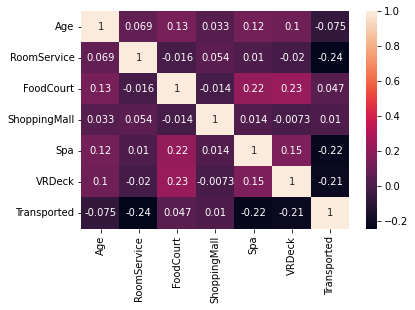

In [27]:
train_corr = train_df.corr()
sns.heatmap(train_corr, annot=True)
plt.show()

In [28]:
# There is some amount of weak correlation
# Between Spa / Food Court and VRDeck /Food Court

In [29]:
train_data_numeric = train_df[['Age', 'RoomService', 'Spa', 'VRDeck', 'FoodCourt', 'Cabin_Num']]

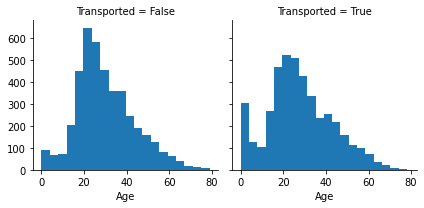

In [30]:
grid_age = sns.FacetGrid(train_df, col='Transported')
grid_age.map(plt.hist, 'Age', bins=20)

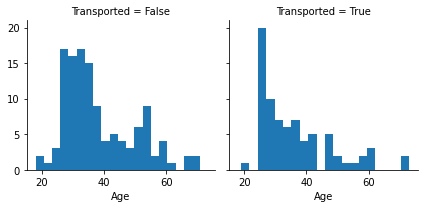

In [31]:
grid_age_vip = sns.FacetGrid(train_df[train_df['VIP']==True], col='Transported')
grid_age_vip.map(plt.hist, 'Age', bins=20)

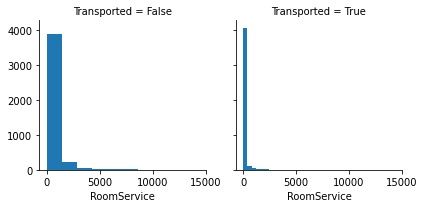

In [32]:
grid_rs = sns.FacetGrid(train_df, col='Transported')
grid_rs.map(plt.hist, 'RoomService', bins=10)

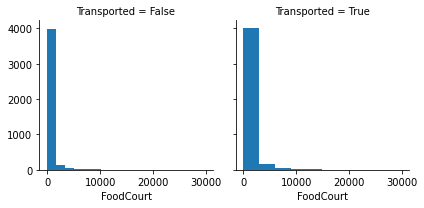

In [33]:
grid_fc = sns.FacetGrid(train_df, col='Transported')
grid_fc.map(plt.hist, 'FoodCourt', bins=10)

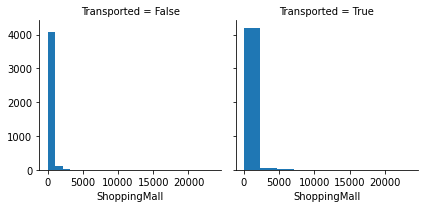

In [34]:
grid_sm = sns.FacetGrid(train_df, col='Transported')
grid_sm.map(plt.hist, 'ShoppingMall', bins=10)

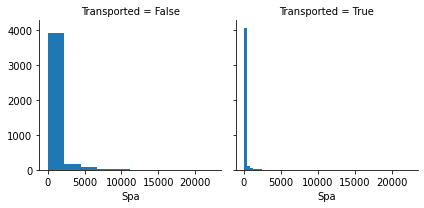

In [35]:
grid_spa = sns.FacetGrid(train_df, col='Transported')
grid_spa.map(plt.hist, 'Spa', bins=10)

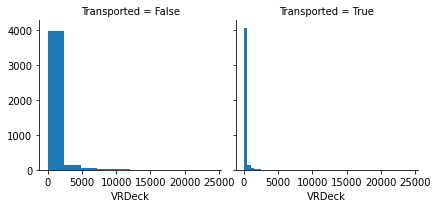

In [36]:
grid_vr = sns.FacetGrid(train_df, col='Transported')
grid_vr.map(plt.hist, 'VRDeck', bins=10)

In [37]:
train_df['Cabin_Num'] = train_df.Cabin_Num.apply(lambda x: int(x) if float(x) >= 0 else np.nan )

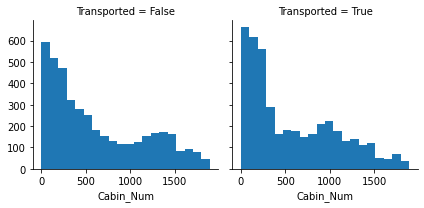

In [38]:
grid_cnum = sns.FacetGrid(train_df, col='Transported')
grid_cnum.map(plt.hist, 'Cabin_Num', bins=20)

In [39]:
# Theese features numeric features need to be normalized or transformed to reduce skew

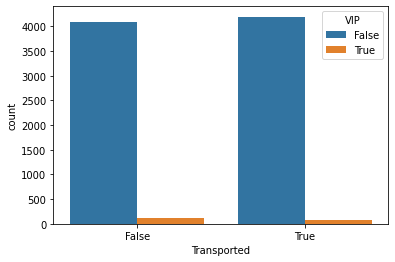

In [40]:
vip = sns.countplot(x='Transported', hue='VIP', data=train_df)

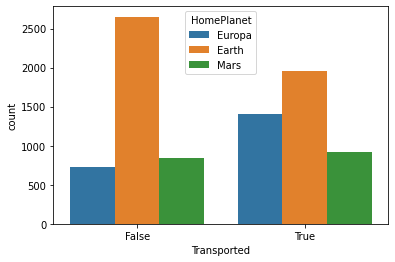

In [41]:
hp = sns.countplot(x='Transported', hue='HomePlanet', data=train_df)

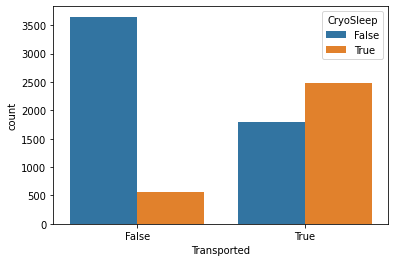

In [42]:
cryo = sns.countplot(x='Transported', hue='CryoSleep', data=train_df)

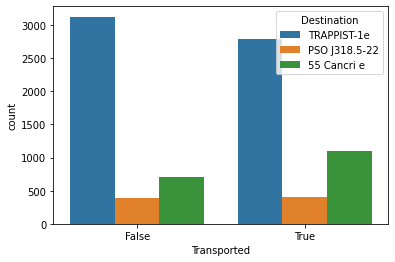

In [43]:
dest = sns.countplot(x='Transported', hue='Destination', data=train_df)

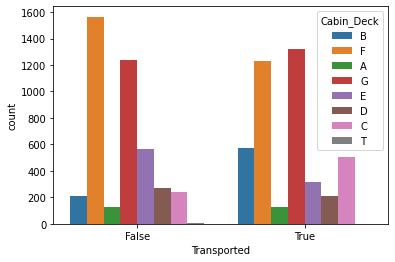

In [44]:
deck = sns.countplot(x='Transported', hue='Cabin_Deck', data=train_df)

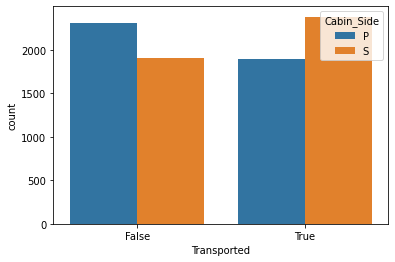

In [45]:
side = sns.countplot(x='Transported', hue='Cabin_Side', data=train_df)

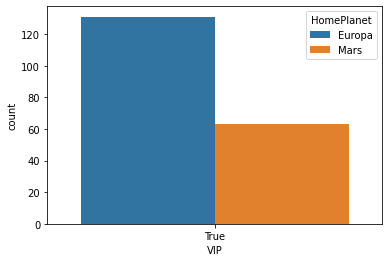

In [46]:
sns.countplot(x='VIP', hue='HomePlanet', data=train_df[train_df['VIP'] == True])

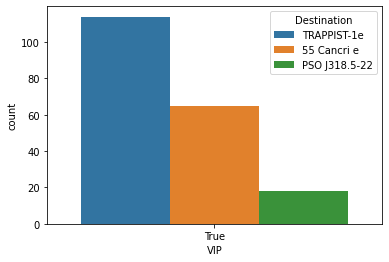

In [47]:
sns.countplot(x='VIP', hue='Destination', data=train_df[train_df['VIP'] == True])

In [48]:
# We can see that the cabin deck, side, and cabin number have an impact on transportation
# It seems that cryosleep will likely have strong feature importance on whether someone was transported

In [49]:
# Childrean, 12 and under, do not spend any money, or it may be attached to their parent's account

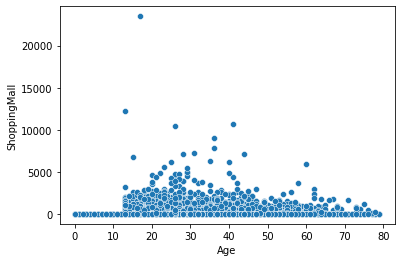

In [50]:
sns.scatterplot(data=train_df, x='Age', y='ShoppingMall')

In [51]:
log_columns = ['FoodCourt','RoomService','VRDeck','Spa','ShoppingMall']
for col in log_columns:
  train_df['{}_log'.format(col)] = train_df['{}'.format(col)].apply(lambda x: np.log(x+1) if float(x) >= 0 else np.nan)

## Data Preprocessing

In [52]:
#We will want to preprocess the data together, to ensure consistency between 
#Train and Test attributes
#For now, we will drop name, can possibly add back in later if necessary

In [53]:
test_df = pd.read_csv('test.csv')

In [54]:
train_df['train_test'] = 1
test_df['train_test'] = 0
test_df['Transported'] = np.nan

all_data = pd.concat([train_df, test_df])

In [55]:
all_data.shape

(12970, 23)

In [56]:
# Splitting Cabin into Deck / Num / Side
all_data['Cabin_Unfil'] = all_data.Cabin.apply(lambda x: str(x).split('/') if type(x) != float else np.nan)['Cabin_Unfil'] = train_df.Cabin.apply(lambda x: str(x).split('/') if type(x) != float else np.nan)

all_data['Cabin_Deck'] = all_data.Cabin_Unfil.apply(lambda x: x[0] if type(x) == list else np.nan)
all_data['Cabin_Num'] = all_data.Cabin_Unfil.apply(lambda x: x[1] if type(x) == list else np.nan )
all_data['Cabin_Side'] = all_data.Cabin_Unfil.apply(lambda x: x[2] if type(x) == list else np.nan)

all_data = all_data.drop('Cabin_Unfil', axis=1)

In [57]:
# Transforming cash values -> log cash values

log_columns = ['FoodCourt','RoomService','VRDeck','Spa','ShoppingMall']

for col in log_columns:
  all_data['{}_log'.format(col)] = all_data['{}'.format(col)].apply(lambda x: np.log(x+1) 
  if float(x) >= 0 else np.nan)

In [58]:
# Creating Attribute for # of people in a group using passengerid

all_data['PassengerSet'] = all_data.PassengerId.apply(lambda x: x.split('_')[0])
all_data['NumberTicket'] = all_data.PassengerId.apply(lambda x: x.split('_')[1])

all_data['GroupSize'] = 0

In [59]:
for index, row in all_data.iterrows():
  all_data.at[index, 'GroupSize'] = len(all_data[all_data['PassengerSet'] == all_data.iloc[index]['PassengerSet']])

In [60]:
all_data.NumberTicket.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object)

In [61]:
# Cleaning up features in dataset

all_data = all_data.drop(['Cabin', 'RoomService', 'FoodCourt','Spa','VRDeck','ShoppingMall',
               'Name', 'Cabin_Num', 'PassengerSet', 'NumberTicket'], axis=1)

In [62]:
all_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Cabin_Deck,Cabin_Side,FoodCourt_log,RoomService_log,VRDeck_log,Spa_log,ShoppingMall_log,train_test,GroupSize
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,B,P,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,1.0,F,S,2.302585,4.700480,3.806662,6.309918,3.258097,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,0.0,A,S,8.182280,3.784190,3.912023,8.812248,0.000000,1,2
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,A,S,7.157735,0.000000,5.267858,8.110728,5.918894,1,2
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,1.0,F,S,4.262680,5.717028,1.098612,6.338594,5.023881,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,NaN,E,S,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,NaN,F,S,6.742881,0.000000,4.976734,2.397895,2.890372,0,1
4274,9271_01,Mars,True,55 Cancri e,NaN,False,NaN,F,P,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
4275,9273_01,Europa,False,NaN,NaN,False,NaN,C,P,7.893945,0.000000,6.261492,0.000000,0.000000,0,1


In [63]:
all_data['Cabin_Side'] = all_data.Cabin_Side.replace('P', 1)
all_data['Cabin_Side'] = all_data.Cabin_Side.replace('S', 0)

## Imputing Data

In [64]:
# Since normally test data is not seen, I will break the all_data back to train / test
# to build the imputer models

In [65]:
train_df = all_data[all_data['train_test'] == 1]
train_df.shape

(8693, 16)

In [66]:
#Imputing Categorical Data

from sklearn.impute import SimpleImputer

simp_imp = SimpleImputer(strategy='most_frequent')
simp_imp.fit(train_df[['HomePlanet', 'Cabin_Deck', 'Destination']])

all_data[['HomePlanet', 'Cabin_Deck', 'Destination']] = simp_imp.transform(all_data[['HomePlanet', 'Cabin_Deck', 'Destination']])

In [67]:
# Converting categorical data into one hot vector

all_data = pd.get_dummies(all_data, columns=['HomePlanet'], prefix='home')
all_data = pd.get_dummies(all_data, columns=['Destination'], prefix='dest')
all_data = pd.get_dummies(all_data, columns=['Cabin_Deck'], prefix='deck')
all_data = pd.get_dummies(all_data, columns=['GroupSize'], prefix='groupsize')

In [68]:
# Filling in NAs for age as median

all_data['Age'] = all_data.Age.fillna(all_data['Age'].median())

In [69]:
# If Age <= 12, all cash values = 0

all_data.loc[all_data['Age'] <= 12, ['FoodCourt_log', 'RoomService_log', 'VRDeck_log', 'Spa_log', 'ShoppingMall_log']] = 0

In [70]:
# Setting booleans to float64

all_data['VIP'] = all_data['VIP'].astype('float64')
all_data['CryoSleep'] = all_data['CryoSleep'].astype('float64')
all_data['Cabin_Side'] = all_data['Cabin_Side'].astype('float64')

In [71]:
# Fitting the regression imputer to train_df, and transforming all the data

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

cash_col = ['FoodCourt_log', 'RoomService_log','VRDeck_log', 'Spa_log', 'ShoppingMall_log']

it_imp = IterativeImputer(max_iter=10, imputation_order='ascending')
it_imp.fit(train_df[cash_col])
all_data[cash_col] = it_imp.fit_transform(all_data[cash_col])

In [72]:
# Carrying the changes over to the training set

train_df = all_data[all_data['train_test'] == 1]
train_df.shape

(8693, 34)

In [73]:
# train_df will be used to train the KNNImputer without unnecessary attributes
train_df = train_df.drop(['PassengerId', 'Transported', 'train_test'], axis=1)

In [74]:
train_df.columns

Index(['CryoSleep', 'Age', 'VIP', 'Cabin_Side', 'FoodCourt_log',
       'RoomService_log', 'VRDeck_log', 'Spa_log', 'ShoppingMall_log',
       'home_Earth', 'home_Europa', 'home_Mars', 'dest_55 Cancri e',
       'dest_PSO J318.5-22', 'dest_TRAPPIST-1e', 'deck_A', 'deck_B', 'deck_C',
       'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T', 'groupsize_1',
       'groupsize_2', 'groupsize_3', 'groupsize_4', 'groupsize_5',
       'groupsize_6', 'groupsize_7', 'groupsize_8'],
      dtype='object')

In [75]:
# Making a copy of the dataframe to fit the KNN imputer. Relevant columns will be added back
# to the main dataframe after transformation
all_data_temp = all_data.drop(['PassengerId', 'Transported', 'train_test'], axis=1)

In [76]:
from sklearn.impute import KNNImputer

knn_imp = KNNImputer(n_neighbors=3, weights='distance')
knn_imp.fit(train_df)
all_data_temp = pd.DataFrame(knn_imp.transform(all_data_temp), columns=all_data_temp.columns)

In [77]:
all_data[['VIP', 'CryoSleep', 'Cabin_Side']] = all_data_temp[['VIP', 'CryoSleep', 'Cabin_Side']]

In [78]:
# All missing attributes are accounted for.
all_data.isnull().sum()

PassengerId              0
CryoSleep                0
Age                      0
VIP                      0
Transported           4277
Cabin_Side               0
FoodCourt_log            0
RoomService_log          0
VRDeck_log               0
Spa_log                  0
ShoppingMall_log         0
train_test               0
home_Earth               0
home_Europa              0
home_Mars                0
dest_55 Cancri e         0
dest_PSO J318.5-22       0
dest_TRAPPIST-1e         0
deck_A                   0
deck_B                   0
deck_C                   0
deck_D                   0
deck_E                   0
deck_F                   0
deck_G                   0
deck_T                   0
groupsize_1              0
groupsize_2              0
groupsize_3              0
groupsize_4              0
groupsize_5              0
groupsize_6              0
groupsize_7              0
groupsize_8              0
dtype: int64

In [79]:
# Scale data for certain classifiers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

all_data_scaled = all_data.copy()
all_data_scaled[['Age','FoodCourt_log', 'RoomService_log', 'VRDeck_log', 'Spa_log', 'ShoppingMall_log']] = scaler.fit_transform(all_data_scaled[['Age','FoodCourt_log', 'RoomService_log', 'VRDeck_log', 'Spa_log', 'ShoppingMall_log']])

In [80]:
all_data_scaled.head()

,PassengerId,CryoSleep,Age,VIP,Transported,Cabin_Side,FoodCourt_log,RoomService_log,VRDeck_log,Spa_log,...,deck_G,deck_T,groupsize_1,groupsize_2,groupsize_3,groupsize_4,groupsize_5,groupsize_6,groupsize_7,groupsize_8
0,0001_01,0.0,0.720932,0.0,0.0,1.0,-0.663909,-0.654744,-0.647432,-0.679005,...,0,0,1,0,0,0,0,0,0,0
1,0002_01,0.0,-0.332557,0.0,1.0,0.0,0.123074,1.076056,0.744649,1.608926,...,0,0,1,0,0,0,0,0,0,0
2,0003_01,0.0,2.055350,1.0,0.0,0.0,2.132648,0.738662,0.783179,2.516253,...,0,0,0,1,0,0,0,0,0,0
3,0003_02,0.0,0.299536,0.0,0.0,0.0,1.782477,-0.654744,1.279003,2.261887,...,0,0,0,1,0,0,0,0,0,0
4,0004_01,0.0,-0.894417,0.0,1.0,0.0,0.792999,1.450367,-0.245674,1.619324,...,0,0,1,0,0,0,0,0,0,0


In [81]:
# Splitting data back into the appropriate sets.

# Unscaled Data
train_df = all_data[all_data['train_test'] == 1]
test_df = all_data[all_data['train_test'] == 0]

# Scaled data
train_df_scaled = all_data_scaled[all_data_scaled['train_test'] == 1]
test_df_scaled = all_data_scaled[all_data_scaled['train_test'] == 0]

print(train_df.shape)
print(test_df.shape)

(8693, 34)
(4277, 34)


## Model Building

In [82]:
# Splitting training set into attributes / label

X_train = train_df.drop(['Transported', 'PassengerId', 'train_test'], axis=1)
X_train_scaled = train_df_scaled.drop(['Transported', 'PassengerId', 'train_test'], axis=1)
y_train = train_df['Transported']

#Splitting testset appropriately

X_test = test_df.drop(['Transported', 'PassengerId', 'train_test'], axis=1)
X_test_scaled = test_df_scaled.drop(['Transported', 'PassengerId', 'train_test'], axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(8693, 31)
(8693,)
(4277, 31)


In [83]:
# Generating baseline model

from sklearn.dummy import DummyClassifier

# Importing classical machine learning models and ensembles
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)

# I'm going to experiment with XGBoost
from xgboost import XGBClassifier

# Using k-fold validation to evaluate model performance
from sklearn.model_selection import cross_val_score

In [84]:
# Establishing baseline model to be the mean

dummy = DummyClassifier(strategy='most_frequent')
dum_cv = cross_val_score(dummy, X_train, y_train)

print(dum_cv)
print(dum_cv.mean())

[0.50373778 0.50373778 0.50373778 0.50345224 0.50345224]
0.5036235657835443


In [85]:
# Logistic Regression

lr = LogisticRegression(max_iter=1500, penalty='l2')

lr_cv1 = cross_val_score(lr, X_train_scaled, y_train)
lr_cv2 = cross_val_score(lr, X_train, y_train)

print(lr_cv1)
print(lr_cv1.mean())
print()
print(lr_cv2)
print(lr_cv2.mean())

[0.76480736 0.77573318 0.78148361 0.77445339 0.77675489]
0.7746464874393773

[0.76480736 0.77573318 0.7826337  0.77387802 0.77733026]
0.7748765046906712


In [86]:
# KNN

knn3 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn8 = KNeighborsClassifier(n_neighbors=8, weights='uniform')

knn3_cv = cross_val_score(knn3, X_train_scaled, y_train)
knn5_cv = cross_val_score(knn5, X_train_scaled, y_train)
knn8_cv = cross_val_score(knn8, X_train_scaled, y_train)


print(knn3_cv)
print(knn3_cv.mean())
print(knn5_cv)
print(knn5_cv.mean())
print(knn8_cv)
print(knn8_cv.mean())

[0.73030477 0.72972973 0.74410581 0.74223245 0.75143843]
0.7395622393198478
[0.75388154 0.74295572 0.75560667 0.76869965 0.76237054]
0.756702825784431
[0.74640598 0.75100633 0.76308223 0.77330265 0.77560414]
0.7618802653006801


In [87]:
# SVC

svc = SVC(C=10,probability=False)
svc_cv1 = cross_val_score(svc, X_train, y_train)
svc_cv2 = cross_val_score(svc, X_train_scaled, y_train)
print(svc_cv1)
print(svc_cv1.mean())
print(svc_cv2)
print(svc_cv2.mean())

[0.78953422 0.77918344 0.77803335 0.80379747 0.79459148]
0.7890279918289613
[0.7826337  0.78435883 0.78780909 0.80609896 0.78998849]
0.790177813393542


In [88]:
# Decision Tree

dt = DecisionTreeClassifier()
dt_cv1 = cross_val_score(dt, X_train, y_train)
dt_cv2 = cross_val_score(dt, X_train_scaled, y_train)
print(dt_cv1)
print(dt_cv1.mean())
print(dt_cv2)
print(dt_cv2.mean())

[0.72627947 0.71822887 0.7320299  0.73245109 0.72727273]
0.7272524121702684
[0.72455434 0.71880391 0.73835538 0.73187572 0.73072497]
0.7288628637941861


In [89]:
# Random Forest

rf = RandomForestClassifier(n_estimators=200)
rf_cv = cross_val_score(rf, X_train, y_train)

print(rf_cv)
print(rf_cv.mean())

[0.77573318 0.77458309 0.78205865 0.783084   0.79804373]
0.7827005322292152


In [90]:
# Adaboost

ada = AdaBoostClassifier(n_estimators=100)
ada_cv = cross_val_score(ada, X_train, y_train)

print(ada_cv)
print(ada_cv.mean())

[0.77458309 0.79413456 0.80161012 0.78423475 0.79746835]
0.7904061763205312


In [91]:
# Gradient Boost

gb = GradientBoostingClassifier(n_estimators=205)
gb_cv = cross_val_score(gb, X_train_scaled, y_train)

print(gb_cv)
print(gb_cv.mean())

[0.78378378 0.80046003 0.80736055 0.81357883 0.80667434]
0.8023715069769473


In [92]:
# XGBoost

xgb = XGBClassifier(n_estimators=150)
xgb_cv = cross_val_score(xgb, X_train, y_train)

print(xgb_cv)
print(xgb_cv.mean())

[0.78435883 0.79873491 0.80218516 0.81875719 0.80782509]
0.8023722348796412


In [93]:
# Summary
scores = [dum_cv, lr_cv2, knn8_cv, svc_cv2, dt_cv1, rf_cv, ada_cv, gb_cv, xgb_cv]
val_score = []
for item in scores:
  val_score.append(round(item.mean(), 4))

print(val_score)

[0.5036, 0.7749, 0.7619, 0.7902, 0.7273, 0.7827, 0.7904, 0.8024, 0.8024]


## Model Validation Summary

*   50.36% | Dummy Classifier
*   77.49% | Logistic Regression
*   76.19% | KNN (8NN)
*   <font color='red'>79.02% | Support Vector Classifier</font>
*   72.83% | Decision Tree
*   78.30% | Random Forest
*   <font color='red'>79.04% | AdaBoost</font>
*   <font color='red'>80.24% | GradientBoost</font>
*   <font color='red'>80.24% | XGBoost</font> 



## Model Tuning

In [94]:
# Evaluate attributes with feature importance
rf_fi = RandomForestClassifier()
rf_fi.fit(X_train_scaled, y_train)

feat_imp = (pd.DataFrame(rf_fi.feature_importances_, index=X_train.columns)).sort_values(
    by=0, ascending=False, axis=0
)
feat_imp

,0
Age,0.170779
Spa_log,0.120789
VRDeck_log,0.116439
RoomService_log,0.109954
FoodCourt_log,0.095753
ShoppingMall_log,0.090863
CryoSleep,0.077716
Cabin_Side,0.025834
home_Earth,0.023872
home_Europa,0.018922


In [95]:
# Groupsize and some deck attributes seem to be weak indicators

In [96]:
feat_imp.index

Index(['Age', 'Spa_log', 'VRDeck_log', 'RoomService_log', 'FoodCourt_log',
       'ShoppingMall_log', 'CryoSleep', 'Cabin_Side', 'home_Earth',
       'home_Europa', 'deck_F', 'deck_E', 'groupsize_1', 'dest_TRAPPIST-1e',
       'deck_G', 'home_Mars', 'dest_55 Cancri e', 'groupsize_2', 'groupsize_3',
       'dest_PSO J318.5-22', 'deck_B', 'deck_C', 'groupsize_4', 'groupsize_5',
       'groupsize_7', 'deck_D', 'groupsize_6', 'VIP', 'groupsize_8', 'deck_A',
       'deck_T'],
      dtype='object')

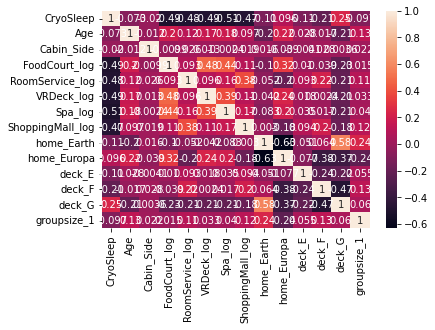

In [97]:
# Removing CryoSleep - too much correlation may cause model to overfit
sns.heatmap(X_train.drop(['dest_TRAPPIST-1e',
       'dest_55 Cancri e', 'home_Mars', 'groupsize_2', 'groupsize_3',
       'dest_PSO J318.5-22', 'deck_C', 'deck_B', 'groupsize_4', 'groupsize_5',
       'groupsize_7', 'deck_D', 'groupsize_6', 'groupsize_8', 'VIP', 'deck_A',
       'deck_T'], axis=1).corr(), annot=True)

In [98]:
X_train_r = X_train.drop(['CryoSleep', 'VIP', 'deck_B', 'deck_C', 'groupsize_4', 'groupsize_5',
       'groupsize_7', 'deck_D', 'groupsize_6', 'groupsize_8', 'VIP', 'deck_A',
       'deck_T'], axis=1)

X_test_r = X_test.drop(['CryoSleep', 'VIP', 'deck_B', 'deck_C', 'groupsize_4', 'groupsize_5',
       'groupsize_7', 'deck_D', 'groupsize_6', 'groupsize_8', 'VIP', 'deck_A',
       'deck_T'], axis=1)

In [99]:
# Searching for the best models

from sklearn.model_selection import GridSearchCV

In [101]:
# SVM

svm_t = SVC()

params = [{'kernel' : ['rbf'],
          'gamma' : [0.1, 0.5, 1, 10],
          'C' : [0.1, 0.3, 0.7, 1, 10]},
          {'kernel' : ['poly'],
           'degree' : [2, 3],
           'C': [0.1, 0.7, 1, 100]}]

svm_gs = GridSearchCV(svm_t, param_grid=params, cv=5, n_jobs=-1)
top_svms = svm_gs.fit(X_train_r, y_train)

print()
print(top_svms.best_score_)
print(top_svms.best_params_)



0.7907535182514984
{'C': 100, 'degree': 2, 'kernel': 'poly'}


In [102]:
# Adaboost

ada_t = AdaBoostClassifier()

params = [{'n_estimators': [75, 100, 150, 200],
           'learning_rate': [0.5, 1, 3]}]

ada_gs = GridSearchCV(ada_t, param_grid=params, cv=5, n_jobs=-1)
top_ada = ada_gs.fit(X_train_r, y_train)

print()
print(top_ada.best_score_)
print(top_ada.best_params_)



0.786151518901317
{'learning_rate': 0.5, 'n_estimators': 200}


In [103]:
# GradientBoost

gb_t = GradientBoostingClassifier()

params = [{'n_estimators': [75, 100, 150, 200],
           'learning_rate': [0.1, 0.5, 1, 3]}]

gb_gs = GridSearchCV(gb_t, param_grid=params, cv=5, n_jobs=-1)
top_gb = gb_gs.fit(X_train_r, y_train)

print()
print(top_gb.best_score_)
print(top_gb.best_params_)



0.7946648041180764
{'learning_rate': 0.1, 'n_estimators': 100}


In [104]:
# XGBoost

xgb_t = XGBClassifier()

params = [{'n_estimators': [75, 100, 150, 200],
           'learning_rate': [0.1, 0.5, 1, 3]}]

xgb_gs = GridSearchCV(xgb_t, param_grid=params, cv=5, n_jobs=-1)
top_xgb = gb_gs.fit(X_train_r, y_train)

print()
print(top_gb.best_score_)
print(top_gb.best_params_)



0.7947798789166954
{'learning_rate': 0.1, 'n_estimators': 100}


In [105]:
def run_cv(classifier, X, y):
  test_model = classifier
  test_cv = cross_val_score(classifier, X, y)
  print('name: {} | {}'.format(classifier, test_cv.mean()))
  return(test_cv.mean())

In [106]:
models_test = [XGBClassifier(n_estimators=100, learning_rate=0.1),
               XGBClassifier(n_estimators=100, learning_rate=0.05),
               XGBClassifier(n_estimators=150, learning_rate=0.1),
               XGBClassifier(n_estimators=150, learning_rate=0.05),
               GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
               GradientBoostingClassifier(n_estimators=150, learning_rate=0.05),
               GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
               GradientBoostingClassifier(n_estimators=150, learning_rate=0.05),
               AdaBoostClassifier(n_estimators=150, learning_rate=0.05),
               AdaBoostClassifier(n_estimators=100, learning_rate=0.1),
               AdaBoostClassifier(n_estimators=150, learning_rate=0.1),
               AdaBoostClassifier(n_estimators=100, learning_rate=0.05),
               ]

scores = []

for model in models_test:
  scores.append(run_cv(model, X_train_r, y_train))
print('=' * 10)
print(models_test[scores.index(max(scores))])
print(max(scores))

name: XGBClassifier() | 0.7930539554563255
name: XGBClassifier(learning_rate=0.05) | 0.7923635066646109
name: XGBClassifier(n_estimators=150) | 0.7950091682652953
name: XGBClassifier(learning_rate=0.05, n_estimators=150) | 0.7937437425183183
name: GradientBoostingClassifier() | 0.7946648041180764
name: GradientBoostingClassifier(learning_rate=0.05, n_estimators=150) | 0.7928241367239481
name: GradientBoostingClassifier() | 0.7946648041180764
name: GradientBoostingClassifier(learning_rate=0.05, n_estimators=150) | 0.7927091280983013
name: AdaBoostClassifier(learning_rate=0.05, n_estimators=150) | 0.7823557710441632
name: AdaBoostClassifier(learning_rate=0.1, n_estimators=100) | 0.7838509493505453
name: AdaBoostClassifier(learning_rate=0.1, n_estimators=150) | 0.785806426851404
name: AdaBoostClassifier(learning_rate=0.05, n_estimators=100) | 0.7772938033643663
XGBClassifier(n_estimators=150)
0.7950091682652953


In [107]:
test_model = XGBClassifier(n_estimators=150, learning_rate=0.1)

In [108]:
fin_classified = test_model

fin_classified.fit(X_train_r, y_train)

predictions1 = fin_classified.predict(X_test_r)

In [109]:
final_data = {'PassengerId': test_df.PassengerId,
              'Transported': predictions1}

In [110]:
submissions = pd.DataFrame(data=final_data)

In [111]:
submissions.Transported = submissions.Transported.astype('bool')

In [112]:
submissions

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [113]:
from datetime import datetime
import pytz
curr_t = (datetime.now(pytz.timezone('America/New_York'))).strftime('_%H%M%S')
print(curr_t)

_190805


In [114]:
# submissions.to_csv('submission{}.csv'.format(curr_t), index=False)

In [115]:
# As of 4/3/2022, 
# This Model | 0.79354 accuracy | 3395 / 4277 correct
# #1 Model   | 0.81646 accuracy | 3492 / 4277 correct